<a href="https://colab.research.google.com/github/philsaurabh/Tutorials/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [70]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [71]:
# To read data as dataframe
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Tutorials/main/Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# Check Null Values

In [72]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

# Model Building
For Simple Linear Regression,

Equation of linear regression

*y=c+m<sub>1</sub>x<sub>1</sub>+m<sub>2</sub>x<sub>2</sub>+...+m<sub>n</sub>x<sub>n</sub>*

*y*  is the response
*c*  is the intercept
*m<sub>1</sub>*  is the coefficient for the first feature
*m<sub>n</sub>*  is the coefficient for the nth feature
In our case:

*y=c+m<sub>1</sub>×TV*

The  *m*  values are called the model coefficients or model parameters.

In [73]:
X = df['TV']#df.iloc[: , 1:3]
y = df['sales']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)# random_state = 100

In [75]:
# The training dataset
print(X_train.head())
print(y_train.head())

182     56.2
186    139.5
134     36.9
150    280.7
25     262.9
Name: TV, dtype: float64
182     8.7
186    10.3
134    10.8
150    16.1
25     12.0
Name: sales, dtype: float64


In [76]:
import statsmodels.api as sm
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [77]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    7.122027
TV       0.046375
dtype: float64

In [78]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     228.3
Date:                Sat, 13 Nov 2021   Prob (F-statistic):           1.76e-32
Time:                        05:47:33   Log-Likelihood:                -419.03
No. Observations:                 160   AIC:                             842.1
Df Residuals:                     158   BIC:                             848.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1220      0.543     13.123      0.0

# Model Evaluation

In [79]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

In [80]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [81]:
y_pred.head()

89     12.214027
27     18.256719
112    15.270155
78      7.372453
50     16.387798
dtype: float64

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.9249123608015277

In [83]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.6742335984460303

# Additional

## Visualization

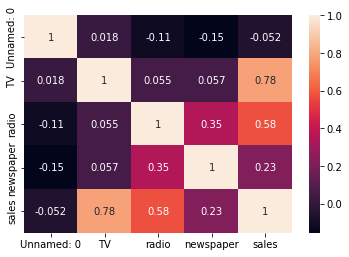

In [84]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns
# Let's see the correlation between different variables.
sns.heatmap(df.corr(),annot= True)# , cmap="YlGnBu", annot = True
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


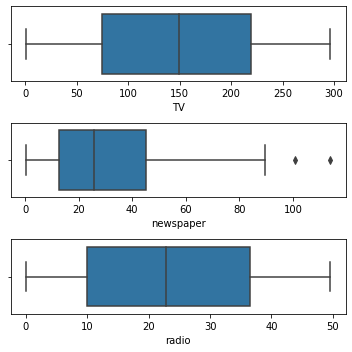

In [85]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

In [86]:
# There are no considerable outliers present in the data.

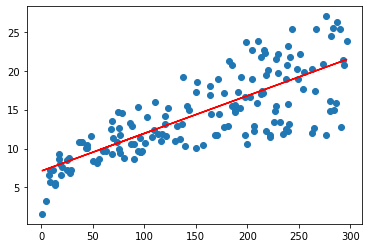

In [87]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 7.1177 + 0.0483*X_train, 'r')
plt.show()

# Using Sklearn

In [88]:
from sklearn.linear_model import LinearRegression
# To read data as dataframe
df = pd.read_csv('https://raw.githubusercontent.com/philsaurabh/Tutorials/main/Advertising.csv')
print(df.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [89]:
feature_cols=['TV','radio']
X = df[feature_cols]
y = df['sales']
#print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)# random_state = 100
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train, y_train))
reg.score(X_test, y_test)

0.9161138176157604


0.7850821006379114

In [90]:
zip(feature_cols,reg.coef_)

In [91]:
y_pred=reg.predict(X_test)

In [92]:
from sklearn import metrics
print(metrics.mean_squared_error(y_test,y_pred))

4.929056054709757


In [93]:
print(metrics.mean_absolute_error(y_test,y_pred))

1.555072456593243


In [94]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))#rmse

2.2201477551527415
